# Transformata fouriera
## Tansformacja fouriera 1D
Transformacja Fouriera to transformacja przekształcająca funkcję ciągłą z dziedziny czasu w inną funkcję ciągłą dziedziny częstotliwości.  Wynikiem transformacji Fouriera jest transformata Fouriera.

### Zastosowania
 - Przetwarzanie sygnałów audio
 - Filtry w dziedzinie częstotliwości

## Dyskretna transformacja fouriera
Służy do transformacji sygnałów dyskretnych.

## FFT - Fast fourier transform

## Transformacja fouriera 2D
Służy do przetwarzania sygnałów o 2 wymiarach np. obrazy.

### Zastosowania
 - Przetwarzanie obrazu
 - Usuwanie szumu
 - Kompresja
 - Wykrywanie krawędzi i filtrowanie

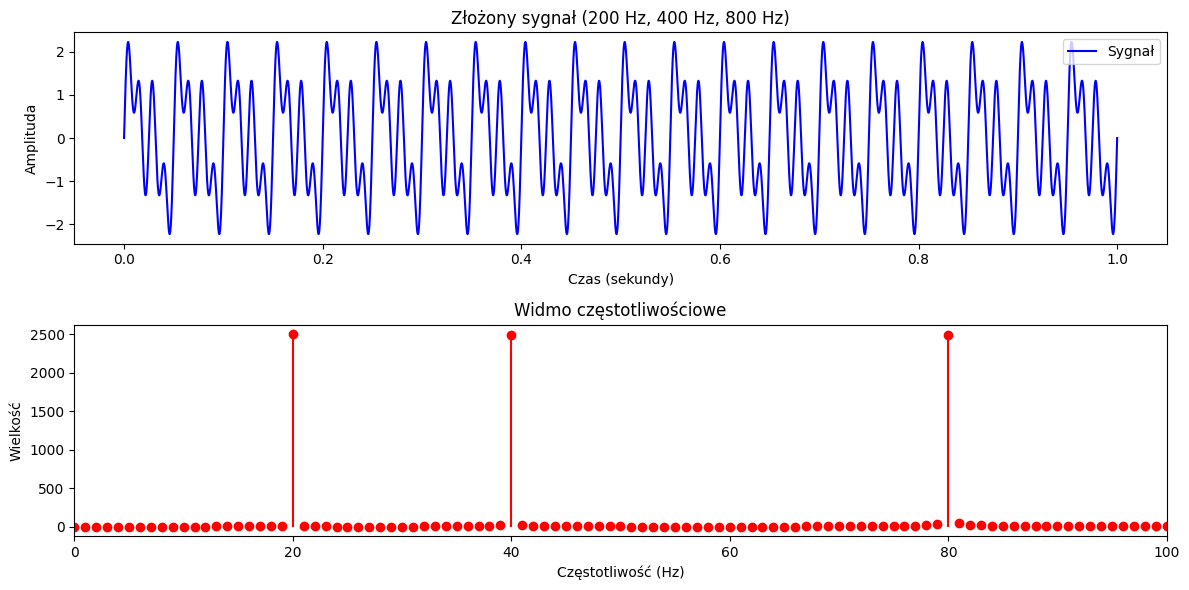

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define sampling rate and time axis
sampling_rate = 5000  # Samples per second
t = np.linspace(0, 1, sampling_rate)  # Time vector over 1 second

# Create the composite signal: sum of 10 Hz, 100 Hz, and 1000 Hz sinusoids
signal = np.sin(2 * np.pi * 20 * t) + np.sin(2 * np.pi * 40 * t) + np.sin(2 * np.pi * 80 * t)

# Perform Fourier Transform
fft = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(t), d=(t[1] - t[0]))  # Frequency axis
magnitude = np.abs(fft)  # Magnitude of the Fourier Transform

# Plot the signal and its frequency spectrum
plt.figure(figsize=(12, 6))

# Plot the composite signal
plt.subplot(2, 1, 1)
plt.title("Złożony sygnał (200 Hz, 400 Hz, 800 Hz)")
plt.plot(t, signal, label="Sygnał", color='blue')
plt.xlabel("Czas (sekundy)")
plt.ylabel("Amplituda")
plt.legend()

# Plot the frequency spectrum
plt.subplot(2, 1, 2)
plt.title("Widmo częstotliwościowe")
plt.stem(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2], linefmt='r-', markerfmt='ro', basefmt=" ")
plt.xlim(0, 100)
plt.xlabel("Częstotliwość (Hz)")
plt.ylabel("Wielkość")
plt.tight_layout()

plt.show()


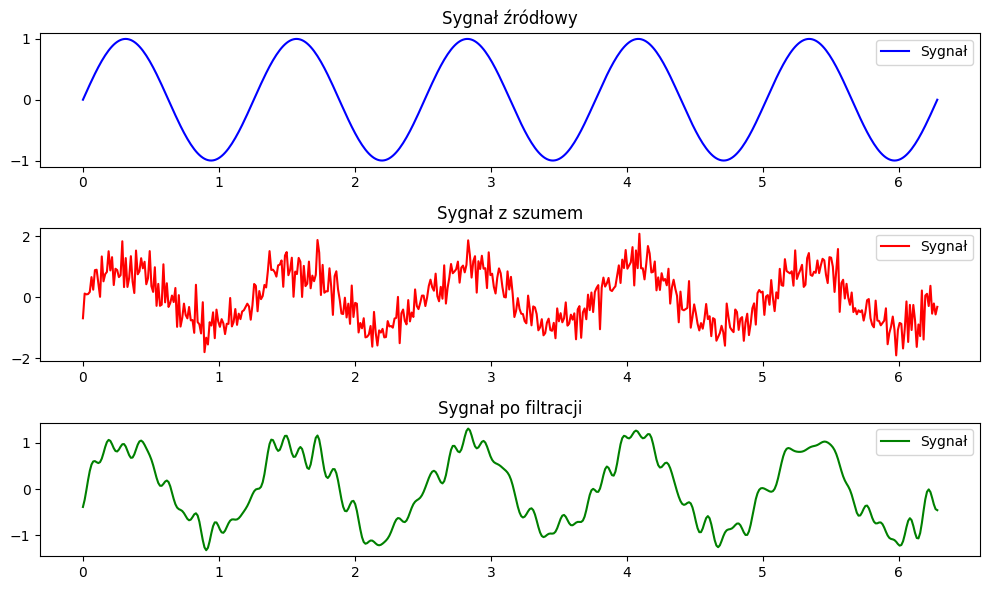

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Create a noisy sine wave
x = np.linspace(0, 2 * np.pi, 500)
signal = np.sin(5 * x)  # Pure sine wave with 5 cycles
noise = 0.4 * np.random.randn(len(x))  # Add random noise
noisy_signal = signal + noise

# Perform Fourier Transform
fft = np.fft.fft(noisy_signal)
frequencies = np.fft.fftfreq(len(x), d=(x[1] - x[0]))

# Apply a low-pass filter to remove high frequencies
fft_filtered = fft.copy()
fft_filtered[np.abs(frequencies) > 10] = 0 # low-pass filter with cutoff frequency of 10 Hz

# Inverse Fourier Transform to get the denoised signal
filtered_signal = np.fft.ifft(fft_filtered)

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.title("Sygnał źródłowy")
plt.plot(x, signal, label="Sygnał", color='blue')
plt.legend()

plt.subplot(3, 1, 2)
plt.title("Sygnał z szumem")
plt.plot(x, noisy_signal, label="Sygnał", color='red')
plt.legend()

plt.subplot(3, 1, 3)
plt.title("Sygnał po filtracji")
plt.plot(x, filtered_signal.real, label="Sygnał", color='green')
plt.legend()

plt.tight_layout()
plt.show()


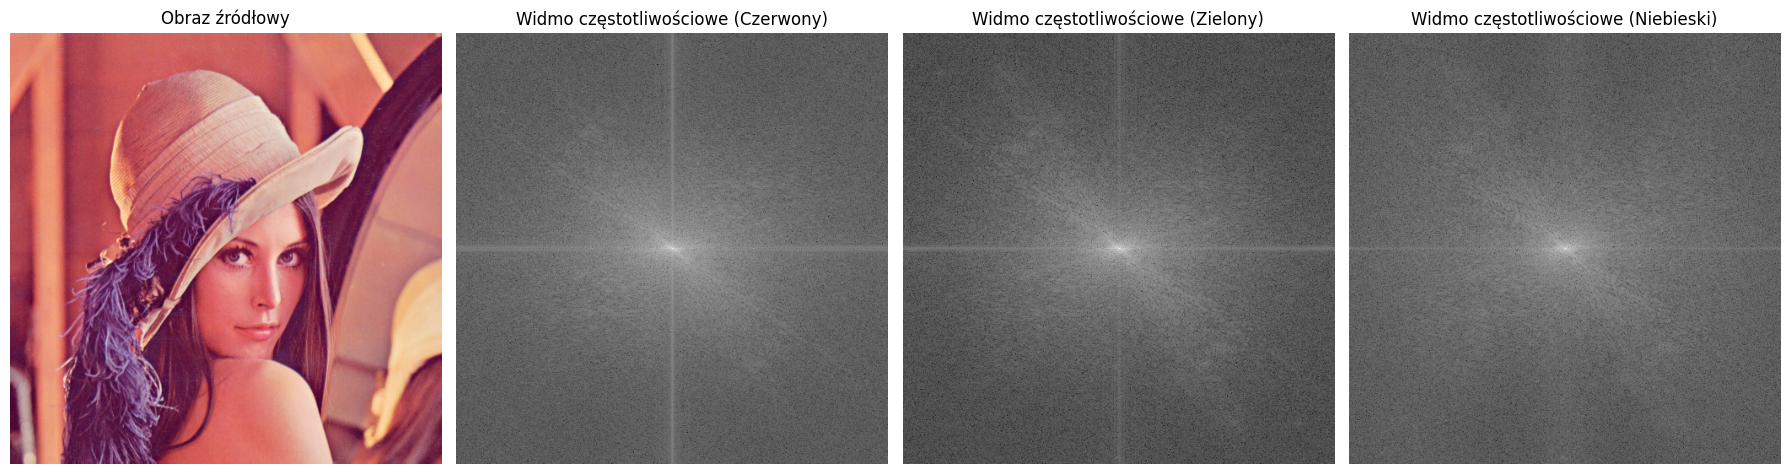

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load a sample image using Pillow
image = Image.open('lenna.png')

# Convert image to numpy array
image_np = np.array(image)

# Perform 2D Fourier Transform on each channel
fft2_r = np.fft.fft2(image_np[:, :, 0])
fft2_g = np.fft.fft2(image_np[:, :, 1])
fft2_b = np.fft.fft2(image_np[:, :, 2])

# Shift zero frequency to the center
fft2_shifted_r = np.fft.fftshift(fft2_r)
fft2_shifted_g = np.fft.fftshift(fft2_g)
fft2_shifted_b = np.fft.fftshift(fft2_b)

# Log scale for better visualization
magnitude_spectrum_r = np.log(1 + np.abs(fft2_shifted_r))
magnitude_spectrum_g = np.log(1 + np.abs(fft2_shifted_g))
magnitude_spectrum_b = np.log(1 + np.abs(fft2_shifted_b))

# Plot the original image and its frequency spectrum for each channel
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.title("Obraz źródłowy")
plt.imshow(image_np)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Widmo częstotliwościowe (Czerwony)")
plt.imshow(magnitude_spectrum_r, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Widmo częstotliwościowe (Zielony)")
plt.imshow(magnitude_spectrum_g, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Widmo częstotliwościowe (Niebieski)")
plt.imshow(magnitude_spectrum_b, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

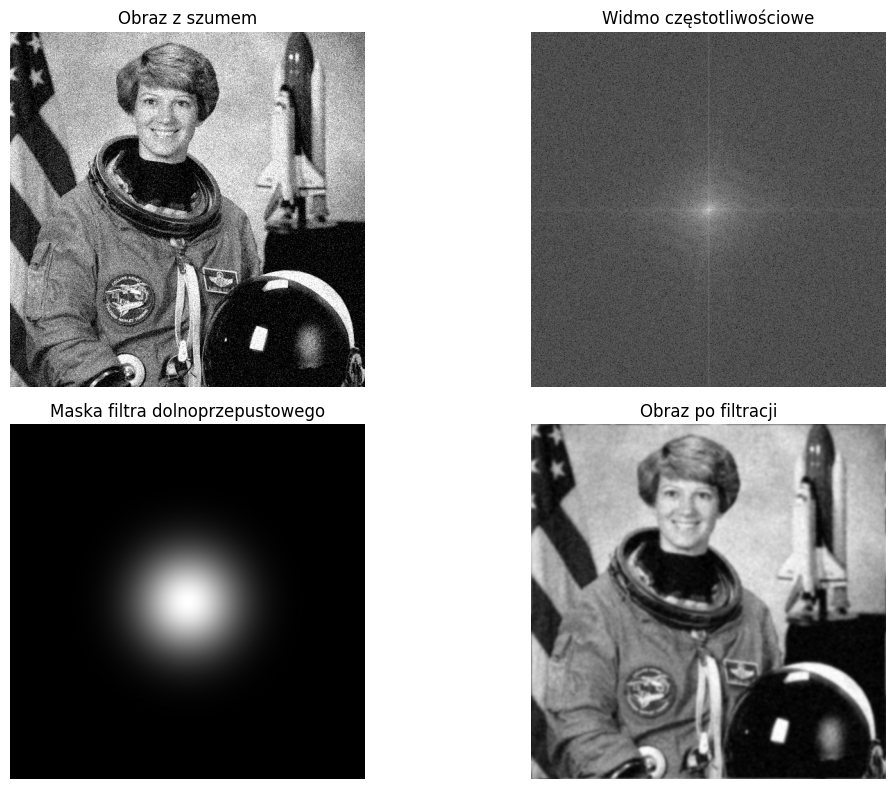

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, util

# Load a sample grayscale image
image = color.rgb2gray(data.astronaut())  # Convert RGB to grayscale
image = util.random_noise(image)

# Perform 2D Fourier Transform
fft2 = np.fft.fft2(image)
fft2_shifted = np.fft.fftshift(fft2)  # Shift zero frequency to the center
magnitude_spectrum = np.log(1 + np.abs(fft2_shifted))

# Create a Gaussian low-pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image
x, y = np.ogrid[:rows, :cols]
d = np.sqrt((x - crow)**2 + (y - ccol)**2)  # Distance from the center
sigma = 50  # Standard deviation of the Gaussian
gaussian_filter = np.exp(-(d**2) / (2 * sigma**2))  # Gaussian function

# Apply the Gaussian filter in frequency domain
fft2_filtered = fft2_shifted * gaussian_filter

# Inverse Fourier Transform to get the denoised image
fft2_inverse = np.fft.ifft2(np.fft.ifftshift(fft2_filtered))
denoised_image = np.abs(fft2_inverse)

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title("Obraz z szumem")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Widmo częstotliwościowe")
plt.imshow(magnitude_spectrum, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Maska filtra dolnoprzepustowego")
plt.imshow(gaussian_filter, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Obraz po filtracji")
plt.imshow(denoised_image, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()
